# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Having not flown with BA fo...
1,✅ Trip Verified | Dear Community I feel compel...
2,✅ Trip Verified | Quick bag drop at First Win...
3,✅ Trip Verified | 4 Hours before takeoff we r...
4,✅ Trip Verified | I recently had a delay on B...


In [5]:
df.to_csv("D:/Forage/BA/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [6]:
df

,reviews
0,✅ Trip Verified | Having not flown with BA fo...
1,✅ Trip Verified | Dear Community I feel compel...
2,✅ Trip Verified | Quick bag drop at First Win...
3,✅ Trip Verified | 4 Hours before takeoff we r...
4,✅ Trip Verified | I recently had a delay on B...
...,...
995,✅ Trip Verified | I understand completely why ...
996,✅ Trip Verified | London to Miami. Worst long ...
997,✅ Trip Verified | I used avios point to upgrad...
998,"✅ Trip Verified | Boarding was fairly quick, t..."


In [7]:
# df['reviews'].str.replace('✅ Trip Verified', '')

0       |  Having not flown with BA for a few years, ...
1       | Dear Community I feel compelled to share th...
2       |  Quick bag drop at First Wing but too many ...
3       |  4 Hours before takeoff we received a Mail ...
4       |  I recently had a delay on British Airways ...
                             ...                        
995     | I understand completely why there is air ra...
996     | London to Miami. Worst long haul business c...
997     | I used avios point to upgrade from economy ...
998     | Boarding was fairly quick, the well turned ...
999     |  Bangalore to London. Ground experience not...
Name: reviews, Length: 1000, dtype: object

In [9]:
df[['Verify','reviews']] = df['reviews'].str.split('|', expand = True)

In [10]:
df

,reviews,Verify
0,"Having not flown with BA for a few years, I ...",✅ Trip Verified
1,Dear Community I feel compelled to share the ...,✅ Trip Verified
2,Quick bag drop at First Wing but too many pa...,✅ Trip Verified
3,4 Hours before takeoff we received a Mail st...,✅ Trip Verified
4,I recently had a delay on British Airways fr...,✅ Trip Verified
...,...,...
995,I understand completely why there is air rage...,✅ Trip Verified
996,London to Miami. Worst long haul business cla...,✅ Trip Verified
997,I used avios point to upgrade from economy to...,✅ Trip Verified
998,"Boarding was fairly quick, the well turned ou...",✅ Trip Verified


In [11]:
df = df.drop('Verify', axis = 1)

In [24]:
df

,reviews
0,"Having not flown with BA for a few years, I ..."
1,Dear Community I feel compelled to share the ...
2,Quick bag drop at First Wing but too many pa...
3,4 Hours before takeoff we received a Mail st...
4,I recently had a delay on British Airways fr...
...,...
995,I understand completely why there is air rage...
996,London to Miami. Worst long haul business cla...
997,I used avios point to upgrade from economy to...
998,"Boarding was fairly quick, the well turned ou..."


In [17]:
pip install textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     ------------------- ----------------- 327.7/636.8 kB 19.8 MB/s eta 0:00:01
     ------------------------- ------------ 419.8/636.8 kB 6.5 MB/s eta 0:00:01
     ------------------------------- ------ 532.5/636.8 kB 5.6 MB/s eta 0:00:01
     -------------------------------------  634.9/636.8 kB 4.4 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
from textblob import TextBlob

In [19]:
# Example text
text = "I love travelling by British Airways."

# Create a TextBlob object
blob = TextBlob(text)

# Get the sentiment polarity (ranges from -1 to 1)
sentiment_polarity = blob.sentiment.polarity

# Determine the sentiment label
if sentiment_polarity > 0:
    sentiment_label = "Positive"
elif sentiment_polarity < 0:
    sentiment_label = "Negative"
else:
    sentiment_label = "Neutral"

# Print the results
print("Text:", text)
print("Sentiment Polarity:", sentiment_polarity)
print("Sentiment Label:", sentiment_label)


Text: I love travelling by British Airways.
Sentiment Polarity: 0.25
Sentiment Label: Positive


In [32]:
# import pandas as pd
# from textblob import TextBlob

# Sample DataFrame
# data = {'TextColumn': ['I love Python!', 'TextBlob is great.', 'Sentiment analysis is interesting.']}
# df = pd.DataFrame(data)

# Function to perform sentiment analysis and return sentiment label
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity

    if sentiment_polarity > 0:
        return "Positive"
    elif sentiment_polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis to each row in 'TextColumn'
df['SentimentPolarity'] = df['reviews'].apply(lambda text: TextBlob(text).sentiment.polarity)
df['SentimentLabel'] = df['reviews'].apply(analyze_sentiment)

# Display the DataFrame with sentiment analysis results
# print(df)


In [33]:
df

,reviews,SentimentPolarity,SentimentLabel
0,"Having not flown with BA for a few years, I ...",-0.069907,Negative
1,Dear Community I feel compelled to share the ...,-0.017752,Negative
2,Quick bag drop at First Wing but too many pa...,0.399167,Positive
3,4 Hours before takeoff we received a Mail st...,-0.045588,Negative
4,I recently had a delay on British Airways fr...,0.006944,Positive
...,...,...,...
995,I understand completely why there is air rage...,0.079497,Positive
996,London to Miami. Worst long haul business cla...,-0.075595,Negative
997,I used avios point to upgrade from economy to...,0.335000,Positive
998,"Boarding was fairly quick, the well turned ou...",0.303571,Positive


In [34]:
import matplotlib.pyplot as plt

In [39]:
clr = ['green', 'red', 'yellow']

In [41]:
sentiment_counts = df['SentimentLabel'].value_counts()

In [47]:
sentiment_counts

Positive    643
Negative    346
Neutral      11
Name: SentimentLabel, dtype: int64

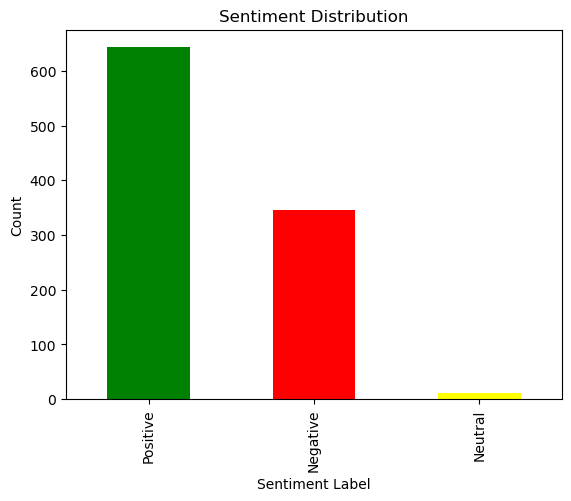

In [54]:
sentiment_counts.plot(kind = 'bar', color = clr)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()